In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pickle

In [102]:
# Load the data
df = pd.read_csv('data/PreparedMessages.csv', sep=';')

# Split into Training and Test data
features = df.drop('label', axis=1).to_numpy()
labels = df['label'].to_numpy()

In [103]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=99)

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=99)

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
Y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.9465648854961832


In [104]:
# Save the model
with open('models/clf.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)
    
# Save the training and test data
data = [X_train, X_test, Y_train, Y_test]
with open('data/Train-Test-Data.pkl', 'wb') as f:
    pickle.dump(data, f)

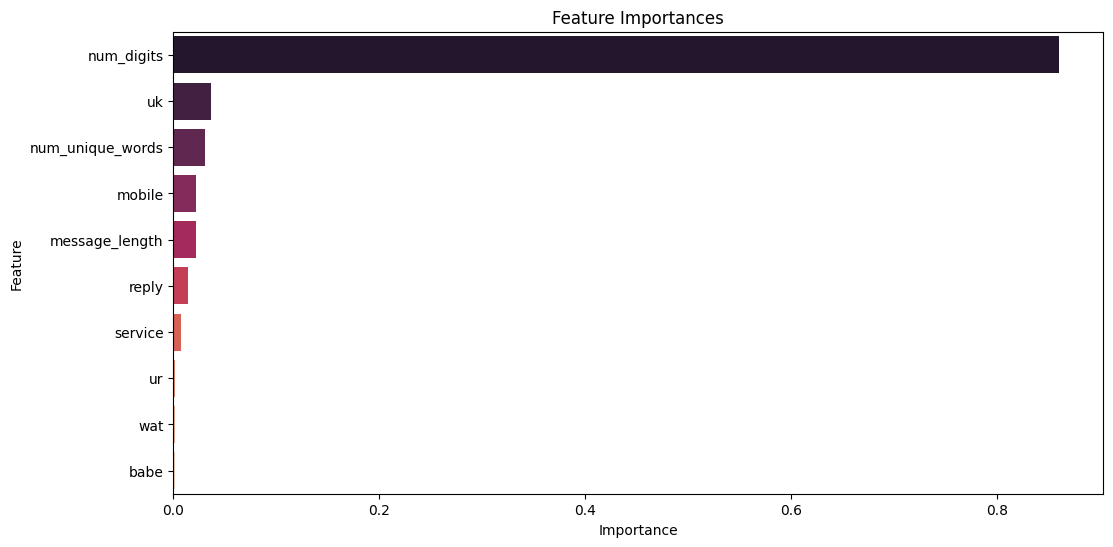

In [105]:
# Get the feature importances and sort them in descending order
importances = grid_search.best_estimator_.feature_importances_
sorted_idx = importances.argsort()[-10:][::-1]

# Get feature names from the dataframe
feature_names = df.drop('label', axis=1).columns

# Create a barplot of the 15 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[sorted_idx], y=[feature_names[i] for i in sorted_idx], palette="rocket")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()